# Taylor Imhof
# Bellevue University | DSC 650
# Assignment05
# Date: 6/26/2022

# Movie Review Classifier

In [1]:
# import imdb dataset from keras
from tensorflow.keras.datasets import imdb

In [2]:
# load imdb movie dataset from TF
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
train_labels[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [9]:
# word index is restricted to < 10,000
# set by passing num_words param to imdb.load_data()
max([max(sequence) for sequence in train_data])

9999

In [10]:
# decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

1646592/1641221 [==============================] - 0s 0us/step


In [12]:
type(decoded_review)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data
 - pad lists to have same length
 - change to integer tensor of shape(samples, max_length)
 - embedding to start capable model
 - multi-hot encode to turn into vectors of 0s and 1s

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the Model

In [16]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [20]:
# compiling the model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
# set aside validation data to test how model performs on "new" data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
# training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 115us/sample - loss: 0.5592 - accuracy: 0.7380 - val_loss: 0.4177 - val_accuracy: 0.8493
Epoch 2/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.3298 - accuracy: 0.8955 - val_loss: 0.3134 - val_accuracy: 0.8876
Epoch 3/20
15000/15000 [==============================] - 1s 78us/sample - loss: 0.2329 - accuracy: 0.9255 - val_loss: 0.2812 - val_accuracy: 0.8924
Epoch 4/20
15000/15000 [==============================] - 1s 76us/sample - loss: 0.1820 - accuracy: 0.9424 - val_loss: 0.2782 - val_accuracy: 0.8899
Epoch 5/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1453 - accuracy: 0.9537 - val_loss: 0.2939 - val_accuracy: 0.8815
Epoch 6/20
15000/15000 [==============================] - 1s 81us/sample - loss: 0.1191 - accuracy: 0.9636 - val_loss: 0.2944 - val_accuracy: 0.8857
Epoch 7/20
15000/15000 [==============================]

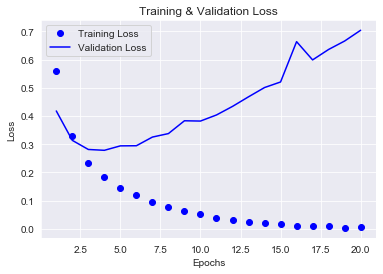

In [24]:
# plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

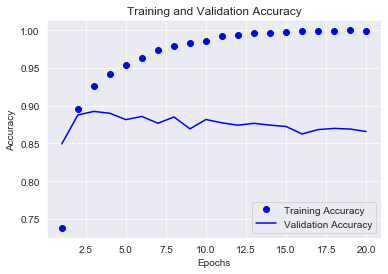

In [25]:
# plotting training and validation accuracy
plt.clf() # clears figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# retrain the model without four epochs as to avoid overfitting/overoptimizing
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4, batch_size=128)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 74us/sample - loss: 0.3604 - accuracy: 0.8560
Epoch 2/4
25000/25000 [==============================] - 1s 56us/sample - loss: 0.2122 - accuracy: 0.9195
Epoch 3/4
25000/25000 [==============================] - 2s 61us/sample - loss: 0.1684 - accuracy: 0.9376
Epoch 4/4
25000/25000 [==============================] - 2s 63us/sample - loss: 0.3640 - accuracy: 0.8704


In [31]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 60us/sample - loss: 0.3640 - accuracy: 0.8704


In [34]:
print(f'Test Loss:\t\t{results[0]:.4f}\nTest Accuracy:\t{results[1]:.4f}')

Test Loss:		0.3640
Test Accuracy:	0.8704


In [35]:
# predict on "new" data
model.predict(x_test)

array([[0.04830925],
       [0.99933356],
       [0.76204664],
       ...,
       [0.09218684],
       [0.02938751],
       [0.51056576]], dtype=float32)

# News Classifier

In [74]:
# load reuters news dataset from keras
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [75]:
# check length of training and testing data
print(len(train_data))
print(len(test_data))

8982
2246


In [76]:
# decode newswire back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Preparing the Data

In [77]:
# vectorize input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [65]:
# vectors labels using one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [78]:
# one-hot encoding implementation built into keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [79]:
# have to use larger units than movie review as there are much
# more dimensions for the different cats of news articles
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [80]:
# compiling the model
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [83]:
# set aside validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [84]:
# training the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 185us/sample - loss: 2.6698 - accuracy: 0.5232 - val_loss: 1.7391 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 94us/sample - loss: 1.4030 - accuracy: 0.7062 - val_loss: 1.2808 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 108us/sample - loss: 1.0261 - accuracy: 0.7769 - val_loss: 1.1107 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 104us/sample - loss: 0.8030 - accuracy: 0.8305 - val_loss: 1.0081 - val_accuracy: 0.7880
Epoch 5/20
7982/7982 [==============================] - 1s 95us/sample - loss: 0.6407 - accuracy: 0.8636 - val_loss: 0.9504 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 91us/sample - loss: 0.5115 - accuracy: 0.8934 - val_loss: 0.9092 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 89us/sam

## Plotting Losses To Determine Best # of Epochs

AttributeError: module 'matplotlib.pyplot' has no attribute 'lenend'

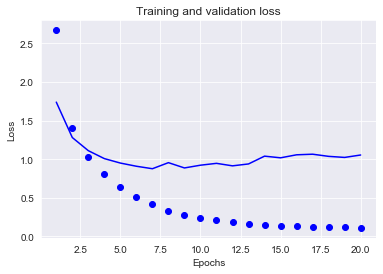

In [85]:
# plot train and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.lenend()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'lenged'

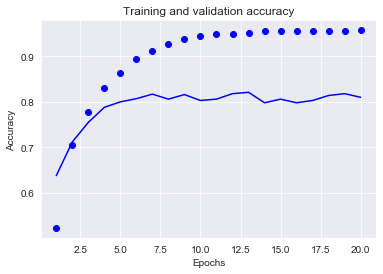

In [86]:
# plotting train/validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.lenged()
plt.show()

It would appear that the values seem to level/taper around 9 epochs

In [87]:
# retrain model with "better" # of epochs
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)
results = model.evaluate(x_test, y_test)

Train on 8982 samples
Epoch 1/9
8982/8982 [==============================] - 1s 126us/sample - loss: 2.3783 - accuracy: 0.5490
Epoch 2/9
8982/8982 [==============================] - 1s 78us/sample - loss: 1.3029 - accuracy: 0.7182
Epoch 3/9
8982/8982 [==============================] - 1s 80us/sample - loss: 0.9606 - accuracy: 0.7958
Epoch 4/9
8982/8982 [==============================] - 1s 92us/sample - loss: 0.7470 - accuracy: 0.8435
Epoch 5/9
8982/8982 [==============================] - 1s 87us/sample - loss: 0.5814 - accuracy: 0.8815
Epoch 6/9
8982/8982 [==============================] - 1s 85us/sample - loss: 0.4609 - accuracy: 0.9058
Epoch 7/9
8982/8982 [==============================] - 1s 90us/sample - loss: 0.3687 - accuracy: 0.9243
Epoch 8/9
8982/8982 [==============================] - 1s 86us/sample - loss: 0.3021 - accuracy: 0.9363
Epoch 9/9
2246/2246 [==============================] - 0s 157us/sample - loss: 0.9694 - accuracy: 0.7890


In [90]:
print(f'Test loss:\t{results[0]:.4f}\nTest Acc:\t{results[1]:.4f}')

Test loss:	0.9694
Test Acc:	0.7890


In [91]:
# check accuracy of random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18432769367764915

## Generate predictions on new data

In [92]:
preds = model.predict(x_test)

In [93]:
preds[0].shape

(46,)

In [94]:
# coefficients of vector values should be 1 as it forms a probability distribution
np.sum(preds[0])

0.99999994

In [95]:
# class with highest probability
np.argmax(preds[0])

3

## Housing Price Regression Model

In [96]:
# load boston housing price data from keras
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [97]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


## Preparing the data

In [98]:
# feature-wise normalization to account for different ranges of measured observations
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Model Definition

In [106]:
#
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1) # no activation as it is a linear layer
    ])
    model.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae']
    )
    return model

## Validation via K-fold Validation

In [102]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    model = build_model()
    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=16,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [107]:
all_scores

[1.9519291, 2.5321727, 2.5141358, 2.418055]

In [108]:
np.mean(all_scores)

2.354073

In [110]:
# same implementation but saving validation logs
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=16,
        verbose=0
    )
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [111]:
# build history of successive mean k-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

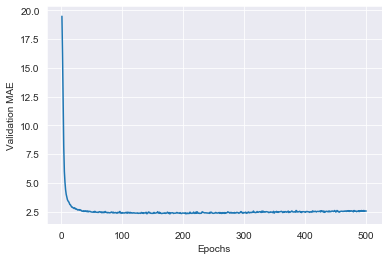

In [112]:
# plot validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

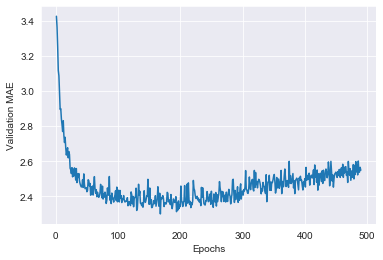

In [113]:
# omit first few data points and re-draw the plot
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [114]:
## Training Final Model

In [118]:
# retrain model with "better" # of epochs
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=130,
    batch_size=16,
    verbose=0
)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 598us/sample - loss: 17.8547 - mae: 2.8682


In [119]:
test_mae_score

2.8682077

## Generate Predictions on New Data

In [120]:
preds = model.predict(test_data)
preds[0]

array([9.15679], dtype=float32)